### Create a program to show the comparison of RNN and LSTM model using the same data.


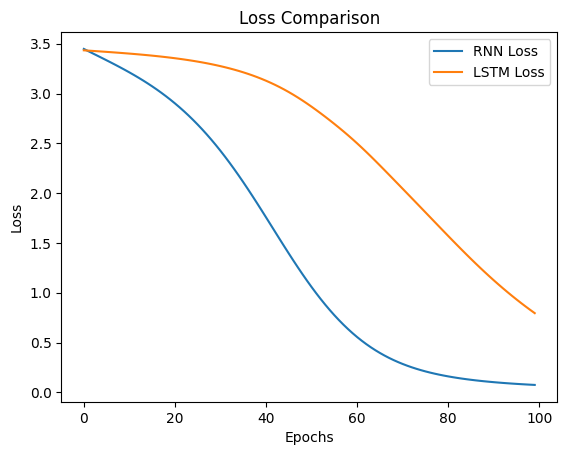

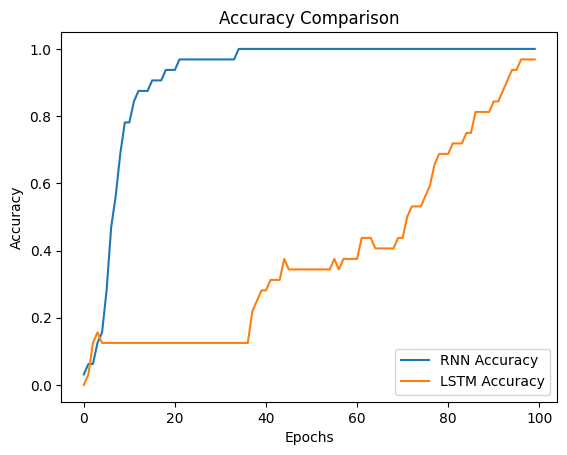

RNN Prediction: a
LSTM Prediction: a


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Sample corpus
corpus = """
Deep learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain.
It is widely used in applications such as image recognition, natural language processing, and robotics.
"""

# Step 1: Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus])
total_words = len(tokenizer.word_index) + 1
word_index = tokenizer.word_index
reverse_index = dict(map(reversed, word_index.items()))

# Step 2: Create input-output pairs
sequence_len = 3
tokens = tokenizer.texts_to_sequences([corpus])[0]
input_sequences = []
for i in range(sequence_len, len(tokens)):
    seq = tokens[i-sequence_len:i+1]
    input_sequences.append(seq)

input_sequences = np.array(input_sequences)
X = input_sequences[:, :-1]
y = to_categorical(input_sequences[:, -1], num_classes=total_words)

# Step 3: Prepare embedding input
def build_model(model_type='rnn'):
    model = Sequential()
    model.add(Embedding(total_words, 64, input_length=sequence_len))
    if model_type == 'rnn':
        model.add(SimpleRNN(64))
    elif model_type == 'lstm':
        model.add(LSTM(64))
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train RNN
rnn_model = build_model('rnn')
rnn_history = rnn_model.fit(X, y, epochs=100, verbose=0)

# Train LSTM
lstm_model = build_model('lstm')
lstm_history = lstm_model.fit(X, y, epochs=100, verbose=0)

# Plot training loss
plt.plot(rnn_history.history['loss'], label='RNN Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(rnn_history.history['accuracy'], label='RNN Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Function to predict next word
def predict_next_word(model, tokenizer, seed_text, seq_len=sequence_len):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=seq_len)
    predicted_probs = model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predicted_probs)
    return reverse_index.get(predicted_index, "unknown")

# Testing predictions
seed = "deep learning is"
print("RNN Prediction:", predict_next_word(rnn_model, tokenizer, seed))
print("LSTM Prediction:", predict_next_word(lstm_model, tokenizer, seed))
